<a href="https://colab.research.google.com/github/steger123/Lawn-mower-robot/blob/master/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
import os

In [ ]:
# load the dataset
dataset = loadtxt('Diabetes.txt', delimiter=',')

In [ ]:
# split into input (X) and output (y) variables
# We can select the first 8 columns from index 0 to index 7 via the slice 0:8.
# We can then select the output column (the 9th variable) via index 8.
X = dataset[:,0:8]
y = dataset[:,8]

In [ ]:
# define the keras model
# The model expects rows of data with 8 variables (the input_dim=8 argument)
# The first hidden layer has 12 nodes and uses the relu activation function.
# The second hidden layer has 8 nodes and uses the relu activation function.
# The output layer has one node and uses the sigmoid activation function.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))  #same 8 coumns as in 'X' dataset
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#When you call the model it's weight matrices will be built. Now you can see that the kernel

model.layers[0].kernel

In [ ]:
#from argparse import ArgumentParser
import argparse
ap = argparse.ArgumentParser()
# ap.add_argument('-f', dest=file, type=string)
#ap.add_argument('-f', dest="file", type=string)
#args = ap.parse_args()
#print args.file

ap.add_argument("-f", "--weights", required=True, help="path to weights directory")
args = vars(ap.parse_args())

In [ ]:
# Checkpoint
#fname = os.path.sep.join([args["weights"], "weights-{epoch:03d}-{val_loss:.4f}.hdf5"])
fname="weights.best.hdf5"
checkpoint = ModelCheckpoint(fname, monitor='val_accuracy', verbose=1,  mode='max', save_freq='epoch')
callbacks_list = [checkpoint]

In [ ]:
## fit the keras model on the dataset ##
history = model.fit(X, y, epochs=100, batch_size=10)

In [ ]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.5517 - accuracy: 0.6615
Accuracy: 66.15


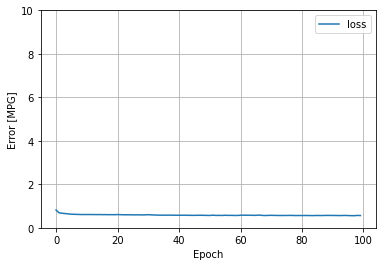

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
 # plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [ ]:
# make class PREDICTIONS with the model:
predictions = model.predict_classes(X)
# summarize the first 5 cases
for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 0 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 0 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 0 (expected 1)


In [ ]:
#np.where(predictions > 0.5, 1,0)

In [ ]:
#### Loading a Check-Pointed Neural Network Model

# How to load and use weights from a checkpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# load weights
model.load_weights("weights.best.hdf5")
# Compile model (required to make predictions)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
